# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
# %pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

In [6]:
print(df_data.shape)
print(f'row are {df_data.shape[0]} and columns are {df_data.shape[1]}')
df_data.columns

(4324, 9)
row are 4324 and columns are 9


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [7]:
print(f'NaN values:{df_data.isna().values.any()}')
print(f'Duplicate values:{df_data.duplicated().values.any()}')
df_data.sample(5)

NaN values:True
Duplicate values:False


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3336,3336,3336,Martin Marietta,"SLC-4E, Vandenberg AFB, California, USA","Tue Jun 15, 1971 18:41 UTC",Titan IIID | KH-9,StatusRetired,NaN,Success
209,209,209,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Tue Oct 09, 2018 02:43 UTC",Long March 2C | Yaogan-32 Group 01,StatusActive,30.8,Success
3074,3074,3074,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Tue Dec 25, 1973 11:17 UTC",Molniya-M /Block L | Molniya-2 n†­39,StatusRetired,NaN,Success
302,302,302,CASC,"LC-3, Xichang Satellite Launch Center, China","Fri Nov 24, 2017 18:10 UTC","Long March 2C | Yaogan-30 D, E, & F",StatusActive,30.8,Success
347,347,347,ILS,"Site 81/24, Baikonur Cosmodrome, Kazakhstan","Thu Jun 08, 2017 03:45 UTC",Proton-M/Briz-M | Echostar 21,StatusActive,65.0,Success


## Data Cleaning - Check for Missing Values and Duplicates



In [8]:
for col in df_data.columns:
    print(f'{col} has NaN values:{df_data[col].isna().values.any()}')

Unnamed: 0.1 has NaN values:False
Unnamed: 0 has NaN values:False
Organisation has NaN values:False
Location has NaN values:False
Date has NaN values:False
Detail has NaN values:False
Rocket_Status has NaN values:False
Price has NaN values:True
Mission_Status has NaN values:False


In [9]:
clean_df = df_data.dropna()
clean_df.isna().values.any()

False

In [10]:
# below dataframe takes the original data without cleaning
not_clean_df = df_data.copy()
not_clean_df.Price = not_clean_df.Price.str.replace(r'[,]', '')
not_clean_df.Price = pd.to_numeric(not_clean_df.Price)
not_clean_df.head()

C:\Users\jayes\AppData\Local\Temp\ipykernel_20844\93476247.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  not_clean_df.Price = not_clean_df.Price.str.replace(r'[,]', '')


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


## Descriptive Statistics

In [11]:
clean_df.Price = clean_df.Price.str.replace(r'[,]', '')  # used to convert string to float value
clean_df.Price = pd.to_numeric(clean_df.Price)
print(type(clean_df.Price[0]))

<class 'numpy.float64'>


C:\Users\jayes\AppData\Local\Temp\ipykernel_20844\18282753.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_df.Price = clean_df.Price.str.replace(r'[,]', '')  # used to convert string to float value
C:\Users\jayes\AppData\Local\Temp\ipykernel_20844\18282753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.Price = clean_df.Price.str.replace(r'[,]', '')  # used to convert string to float value
C:\Users\jayes\AppData\Local\Temp\ipykernel_20844\18282753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [12]:
clean_df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,964.00,964.00,964.00
mean,858.49,858.49,153.79
std,784.21,784.21,288.45
min,0.00,0.00,5.30
25%,324.75,324.75,40.00
50%,660.50,660.50,62.00
75%,"1,112.00","1,112.00",164.00
max,"4,020.00","4,020.00","5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [13]:
launch_df = not_clean_df.groupby(['Organisation']).agg({'Detail': pd.Series.count}).reset_index()
launch_df.rename(columns={'Detail': 'Launch'},  inplace=True)
launch_df.shape

(56, 2)

In [14]:
maximum_launch = launch_df[launch_df['Launch'] == launch_df.Launch.max()].Organisation.values[0]
minimum_launch = launch_df[launch_df['Launch'] == launch_df.Launch.min()].Organisation.values[0]
launch_df.sort_values('Launch', ascending=False, inplace=True)

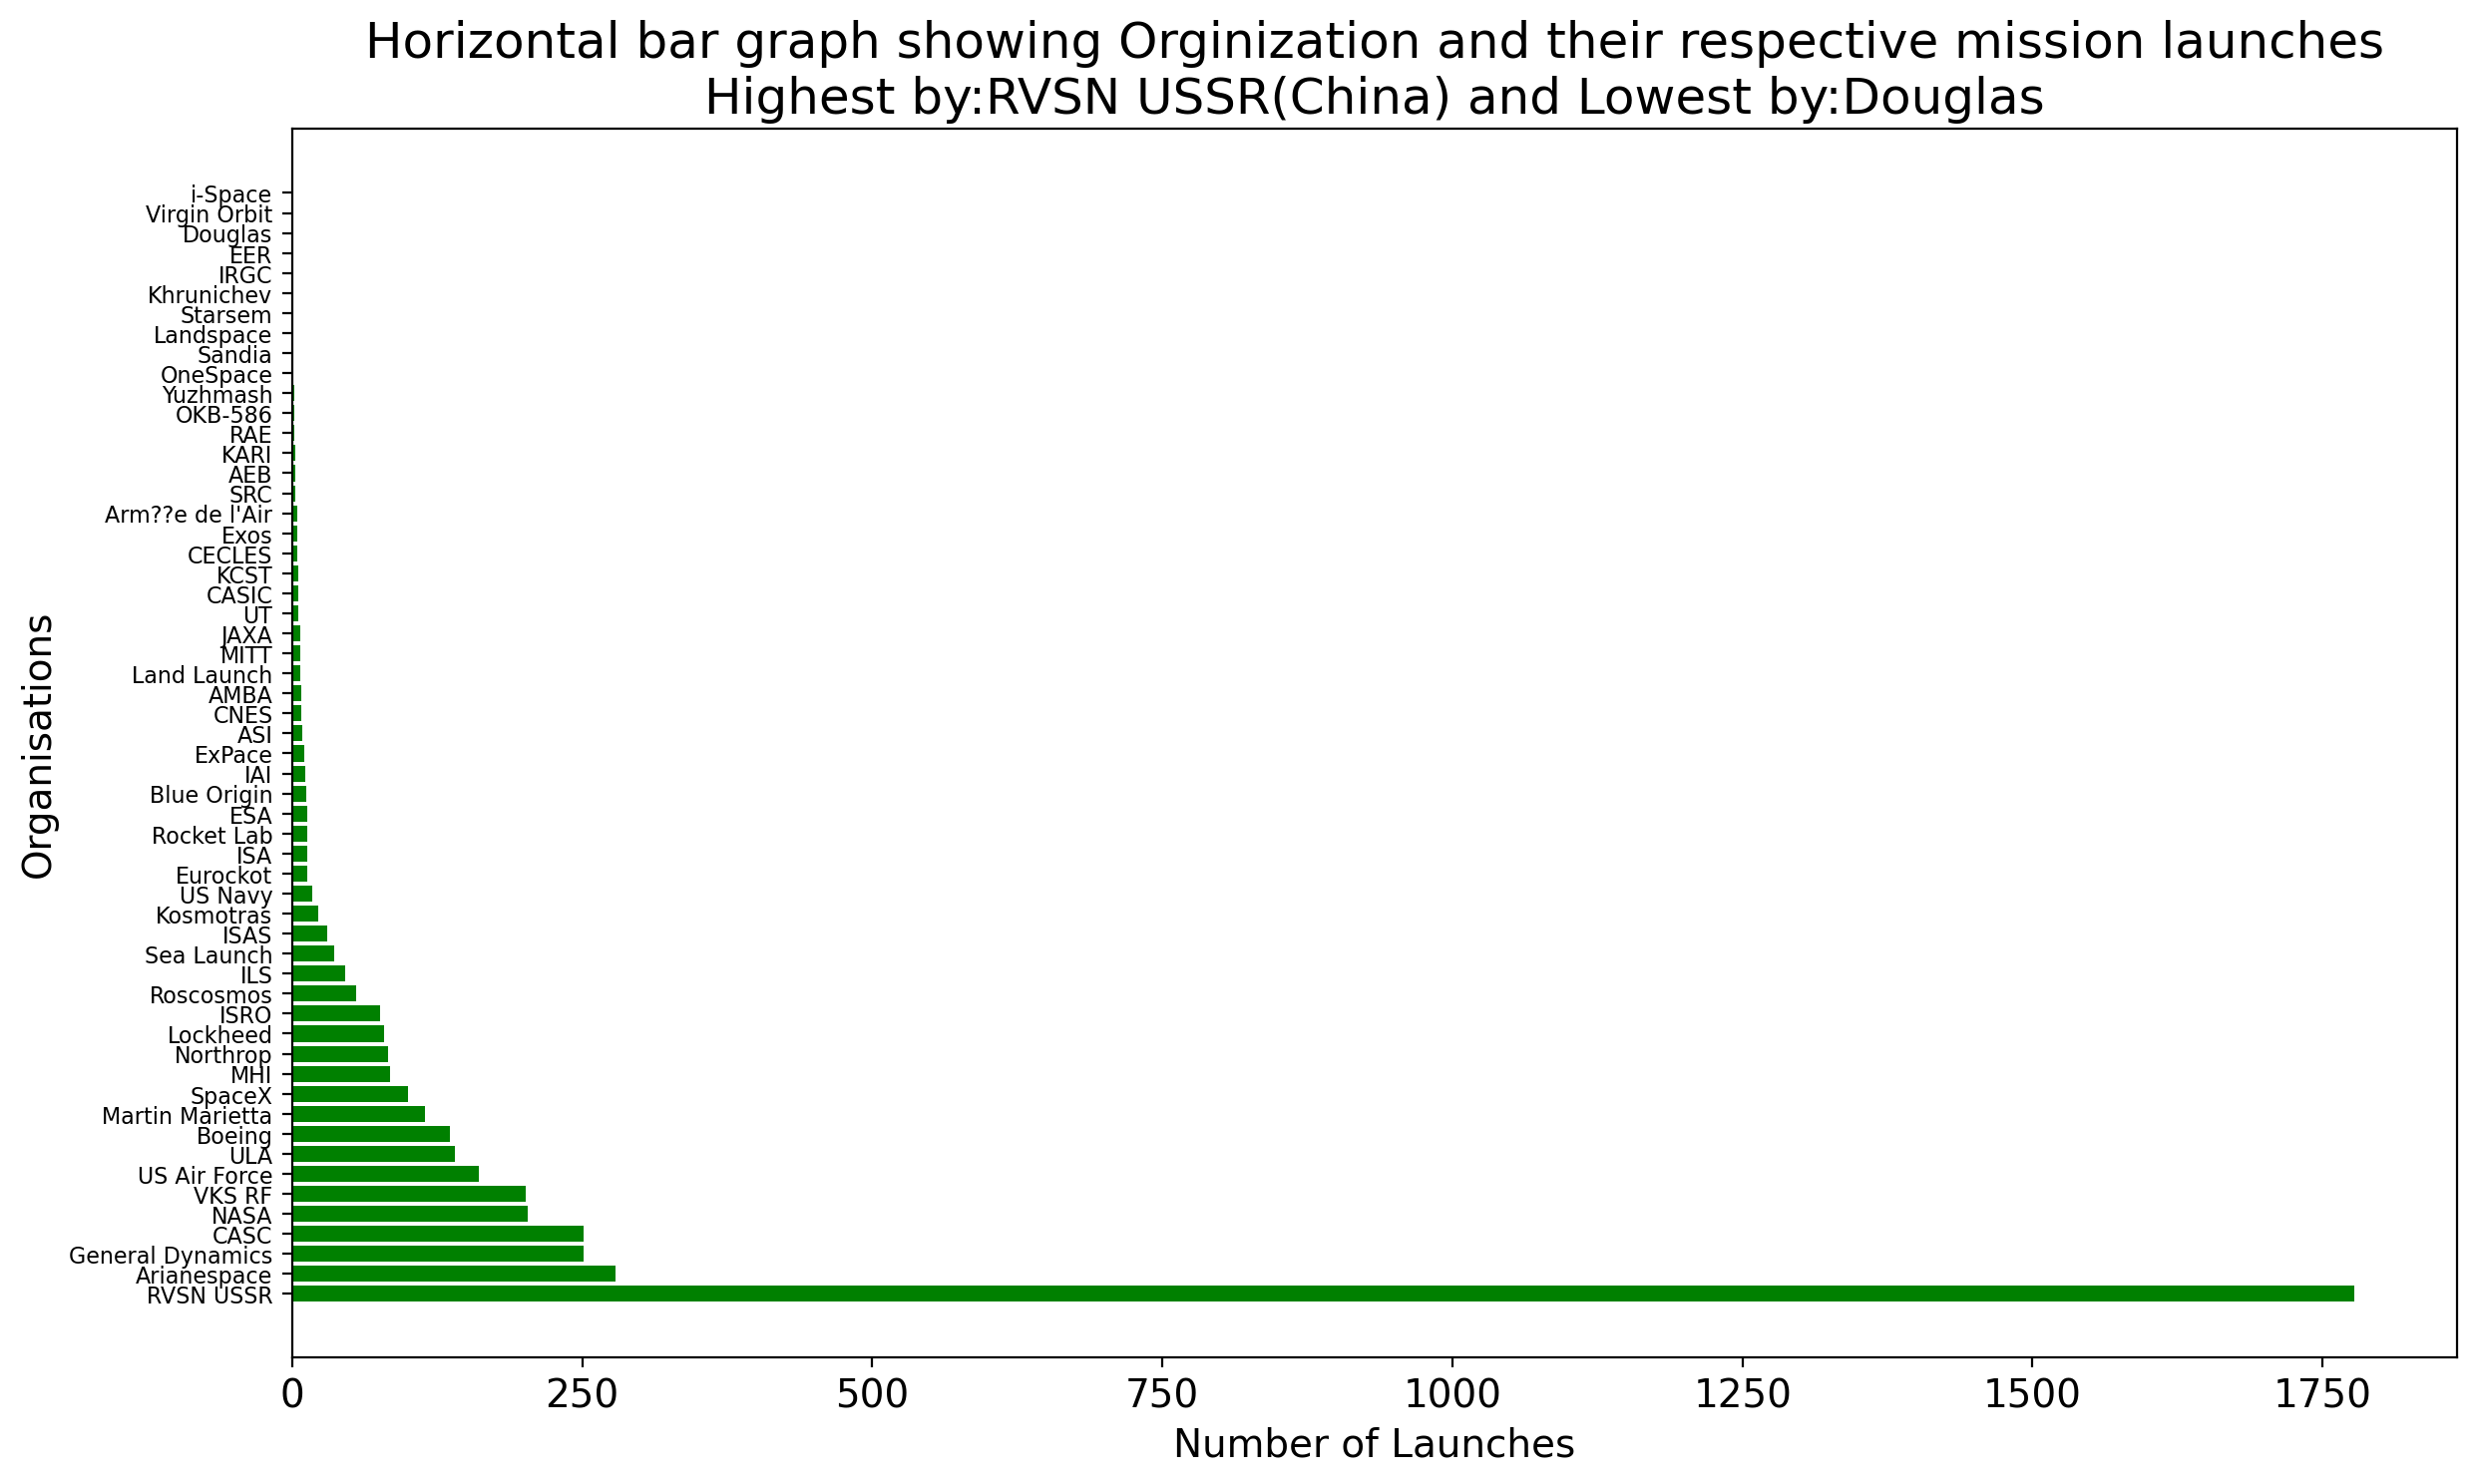

In [15]:
plt.figure(figsize=(14,8), dpi=200)
plt.title(f'Horizontal bar graph showing Orginization and their respective mission launches\nHighest by:{maximum_launch}(China) and Lowest by:{minimum_launch}', fontsize=18)
plt.xlabel('Number of Launches', fontsize=14)
plt.ylabel('Organisations', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=8)
plt.barh(launch_df.Organisation, launch_df.Launch, color='green')
plt.show()

# Number of Active versus Retired Rockets


In [16]:
not_clean_df.Rocket_Status.unique()
rocket_series = not_clean_df.Rocket_Status.value_counts()
rocket_series

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

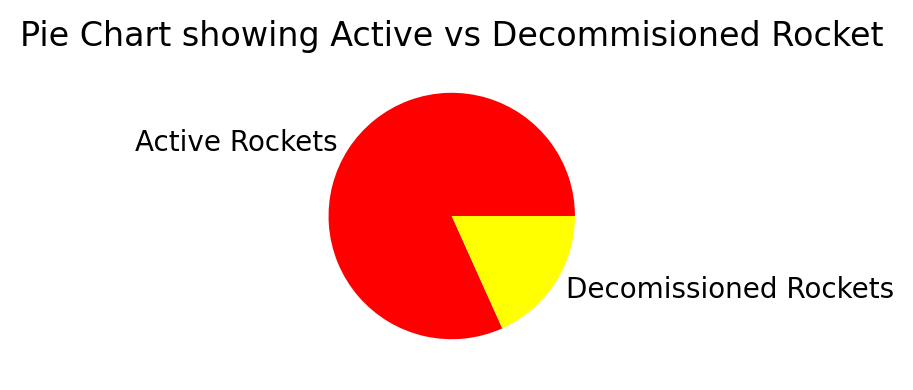

The rockets active are 4.473417721518987 more than compared with decommisioned Rockets. i.e 22%


In [17]:
plt.figure(figsize=(7,2), dpi=200)
plt.title('Pie Chart showing Active vs Decommisioned Rocket')
plt.pie(rocket_series.values, labels=['Active Rockets', 'Decomissioned Rockets'], colors=['red', 'yellow'])
plt.show()
print(f'The rockets active are {rocket_series.values[0]/rocket_series.values[1]} more than compared with decommisioned Rockets. i.e 22%')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [18]:
success_failure_series = not_clean_df.Mission_Status.value_counts()
success_failure_series

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

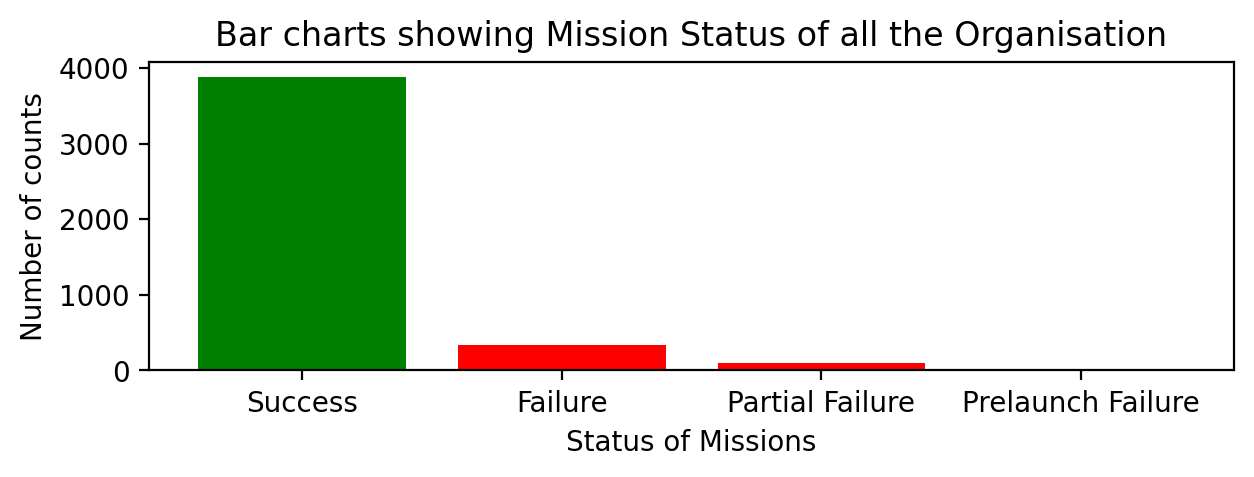

In [19]:
plt.figure(figsize=(7,2), dpi=200)
plt.title('Bar charts showing Mission Status of all the Organisation')
plt.xlabel('Status of Missions')
plt.ylabel('Number of counts')
plt.bar(success_failure_series.index, success_failure_series.values, color=['green', 'red', 'red', 'red'])
plt.show()

# How Expensive are the Launches? 
 

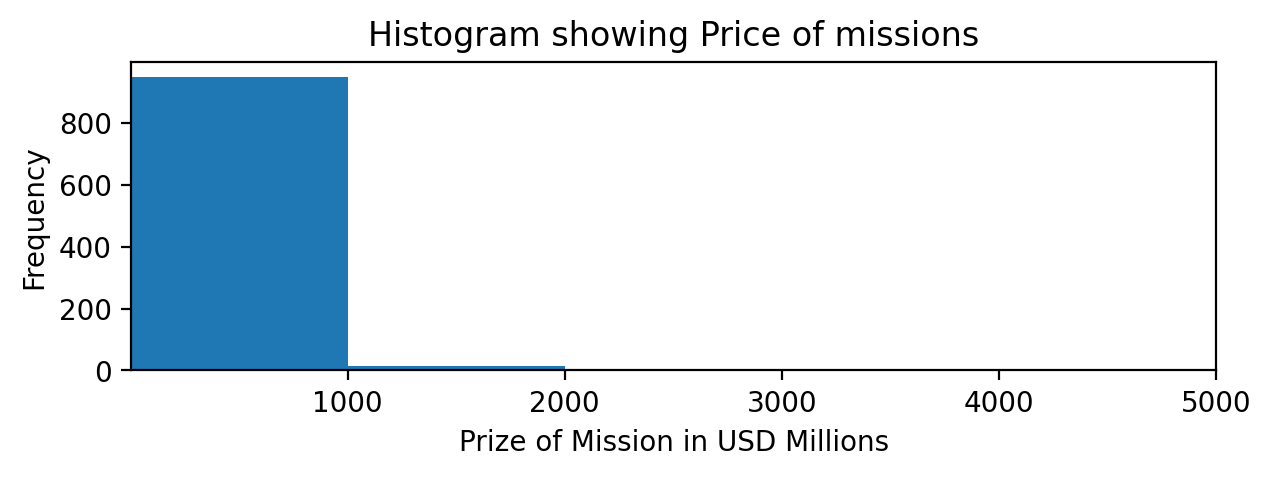

In [20]:
# we use clean_df because prices in not_clean_df are having NaN values
plt.figure(figsize=(7,2), dpi=200)
plt.title('Histogram showing Price of missions')
plt.xlabel('Prize of Mission in USD Millions')
plt.ylabel('Frequency')
plt.xlim(clean_df.Price.min(), clean_df.Price.max())
plt.hist(clean_df.Price, bins=5)
plt.show()

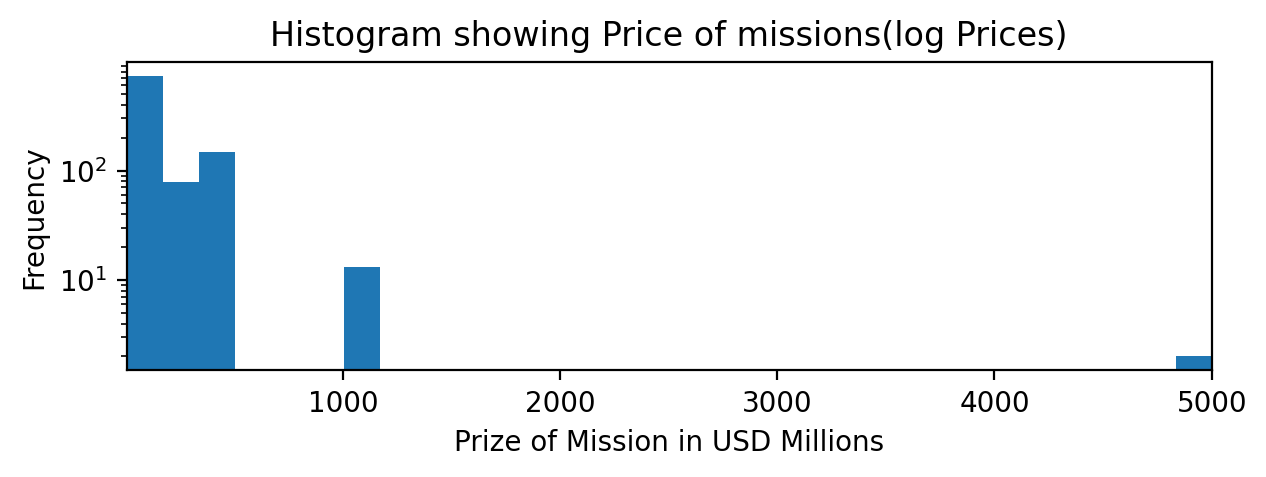

In [68]:
plt.figure(figsize=(7,2), dpi=200)
plt.title('Histogram showing Price of missions(log Prices)')
plt.xlabel('Prize of Mission in USD Millions')
plt.ylabel('Frequency')
plt.xlim(clean_df.Price.min(), clean_df.Price.max())
plt.hist(clean_df.Price, bins=30, log=True)
plt.show()

In [22]:
print('From the below table it is seen that only 2 mission from USSR cost about 5000 USD million and rest were below 1160USD \nas seen from the histogram clearly.')
clean_df.sort_values('Price')

From the below table it is seen that only 2 mission from USSR cost about 5000 USD million and rest were below 1160USD 
as seen from the histogram clearly.


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
102,102,102,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Sep 19, 2019 06:42 UTC",Long March 11 | Zhuhai-1 Group 03,StatusActive,5.30,Success
281,281,281,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jan 19, 2018 04:12 UTC","Long March 11 | Jilin-1 07, 08 & Others",StatusActive,5.30,Success
26,26,26,CASC,"Xichang Satellite Launch Center, China","Fri May 29, 2020 20:13 UTC",Long March 11 | XJS-G and XJS-H,StatusActive,5.30,Success
176,176,176,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Dec 21, 2018 23:51 UTC",Long March 11 | Hongyun-1,StatusActive,5.30,Success
487,487,487,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Sep 25, 2015",Long March 11 | Pujian 1 & Others,StatusActive,5.30,Success
...,...,...,...,...,...,...,...,...,...
3584,3584,3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Mar 03, 1969 16:00 UTC",Saturn V | Apollo 9,StatusRetired,"1,160.00",Success
3511,3511,3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Nov 14, 1969 16:22 UTC",Saturn V | Apollo 12,StatusRetired,"1,160.00",Success
3545,3545,3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,"1,160.00",Success
2000,2000,2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [23]:
location_series = not_clean_df.Location.str.split(',')
cont = []
for loc in location_series:
    if loc[-1] == " Russia":  
       country = countries.get('Russian Federation')
       alpha3 = country.alpha3
       cont.append(alpha3)
    elif loc[-1] == " Yellow Sea":   
       cont.append(countries.get('China').alpha3)
    elif loc[-1] == " Pacific Missile Range Facility":   
       cont.append(countries.get('US').alpha3)
    elif loc[-1] == " Gran Canaria":   
       cont.append(countries.get('US').alpha3)
    elif loc[-1] == ' Barents Sea':
       cont.append(countries.get('Russian Federation').alpha3)
    elif loc[-1] == ' Shahrud Missile Test Site':
       cont.append(countries.get('IR').alpha3)
    elif loc[-1] == ' Iran':
       cont.append(countries.get('IR').alpha3)
    elif loc[-1] == ' North Korea':
       cont.append(countries.get('KP').alpha3)  
    elif loc[-1] == ' South Korea':
       cont.append(countries.get('KR').alpha3)  
    elif loc[-1] == ' Pacific Ocean':
       cont.append(countries.get('KI').alpha3)
    elif loc[-1] == ' New Mexico':
       cont.append(countries.get('US').alpha3)
    else:
       cont.append(countries.get(loc[-1].strip()).alpha3)
       
not_clean_df['Country'] = cont
country_launch_series = not_clean_df.groupby(['Country']).agg({'Detail': pd.Series.count}).reset_index()
country_launch_series.rename(columns={'Detail': 'Launches'}, inplace=True)
country_launch_series


,Country,Launches
0,AUS,6
1,BRA,3
2,CHN,269
3,FRA,303
4,IND,76
5,IRN,14
6,ISR,11
7,JPN,126
8,KAZ,701
9,KEN,9


In [24]:
fig = px.choropleth(country_launch_series, color='Launches', locations="Country",color_continuous_scale=px.colors.sequential.matter)
fig.show()

# Choropleth Map Showing the Number of Failures by Country


In [25]:
x = not_clean_df.groupby(['Mission_Status', 'Country']).size().reset_index(name='Count')
x = x[x['Mission_Status'] != 'Success']
y = x.groupby(['Country']).agg({'Count': pd.Series.sum}).reset_index()
y.rename(columns={'Count':'Failures'}, inplace=True)
y

,Country,Failures
0,AUS,3
1,BRA,3
2,CHN,25
3,FRA,18
4,IND,13
5,IRN,9
6,ISR,2
7,JPN,13
8,KAZ,93
9,KIR,3


In [26]:
fig = px.choropleth(y, locations='Country', color='Failures', color_continuous_scale=px.colors.sequential.matter)
fig.show()

# Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [27]:
fig = px.sunburst(not_clean_df, path=['Country', 'Organisation', 'Mission_Status'])
fig.show()

# Analysing the Total Amount of Money Spent by Organisation on Space Missions

In [28]:
# used clean_df as all the prices are available
money_organisation_series = clean_df.groupby('Organisation')['Price'].sum().reset_index()
money_organisation_series.sort_values('Price', ascending=False, inplace=True, ignore_index=True)
money_organisation_series

,Organisation,Price
0,NASA,"76,280.00"
1,Arianespace,"16,345.00"
2,ULA,"14,798.00"
3,RVSN USSR,"10,000.00"
4,CASC,"6,340.26"
5,SpaceX,"5,444.00"
6,Northrop,"3,930.00"
7,MHI,"3,532.50"
8,ISRO,"2,177.00"
9,US Air Force,"1,550.92"


In [29]:
fig = px.bar(money_organisation_series, x='Organisation', y='Price', color="Organisation", title='Prices vs Organisations', labels={'Price':'Prices in USD Million', 'Organisation':'Organisations'})
fig.show()

In [30]:
money_organisation_series.Price = np.log(money_organisation_series.Price)

In [69]:
print('Please note that the Prices were missing in some rows, this may affect the visualisation slightly.')

Please note that the Prices were missing in some rows, this may affect the visualisation slightly.


In [31]:
fig = px.bar(money_organisation_series, x='Organisation', y='Price', color="Organisation", title='Log prices vs Organisations', labels={'Price':'Log Prices', 'Organisation':'Organisations'})
fig.update_xaxes()
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [32]:
money_spent_perlaunch = clean_df.groupby(['Organisation']).agg({'Price': pd.Series.mean}).reset_index()
money_spent_perlaunch.rename(columns={'Price': 'Average Price per mission'}, inplace=True)
money_spent_perlaunch.sort_values('Average Price per mission', ascending=False, inplace=True)

In [33]:
analysis = px.bar(money_spent_perlaunch, x='Organisation', y='Average Price per mission', title='Money spend by organisation per launch', color='Organisation')
analysis.show()

In [34]:
analysis = px.bar(money_spent_perlaunch[1:], x='Organisation', y='Average Price per mission', title='Money spend by organisation per launch', color='Organisation')
analysis.show()

# The Number of Launches per Year

In [35]:
not_clean_df_dates = not_clean_df.copy()
not_clean_df_dates.Date = pd.to_datetime(not_clean_df_dates.Date, utc=True)
not_clean_df_dates

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ


In [36]:
not_clean_df_dates.Date = not_clean_df_dates.Date.dt.year
x_launch = not_clean_df_dates.groupby('Date').agg({'Organisation': pd.Series.count}).reset_index()
x_launch.rename(columns={'Organisation': 'Number of Launches', 'Date': 'Year'}, inplace=True)
x_launch.head()

,Year,Number of Launches
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52


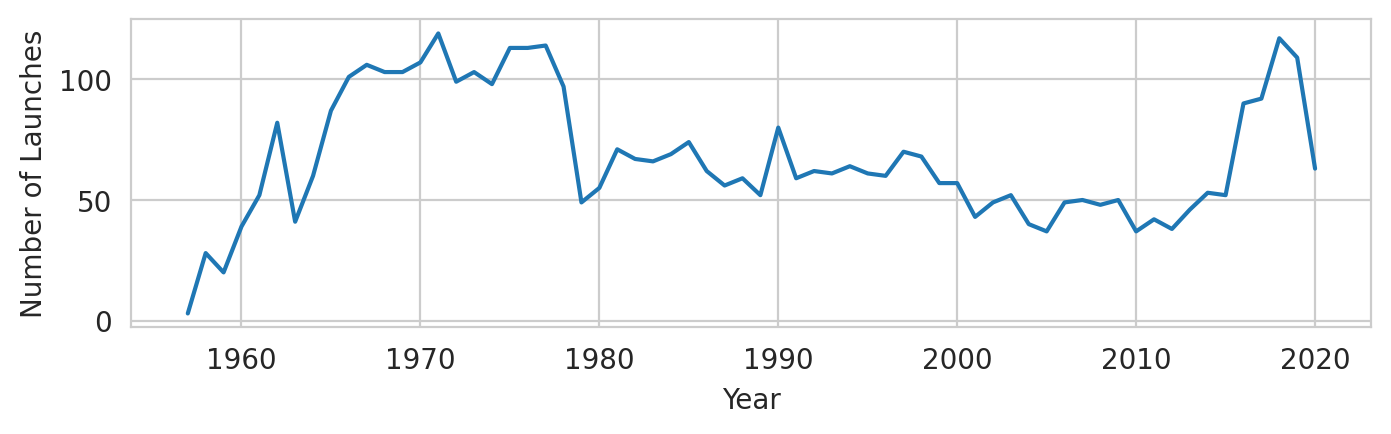

As seen from the graph the number of launches increased from start to 1980s as cold war was going on and after that the launches got stable
 After 2015 the space race was on again and many other countrie started investing in space research, but a dip in the year 2020 is due to covid pandemic.


In [37]:
plt.figure(figsize=(8,2), dpi=200)
with sns.axes_style(style='whitegrid'):
    sns.lineplot(data=x_launch, x='Year', y='Number of Launches')
plt.show()
print('As seen from the graph the number of launches increased from start to 1980s as cold war was going on and after that the launches got stable\n After 2015 the space race was on again and many other countrie started investing in space research, but a dip in the year 2020 is due to covid pandemic.')

# The Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [38]:
not_clean_df_months = not_clean_df.copy()
not_clean_df_months = not_clean_df_months[not_clean_df_months.Mission_Status != 'Prelaunch Failure']
not_clean_df_months.Date = pd.to_datetime(not_clean_df_months.Date, utc=True)
not_clean_df_months.Date = not_clean_df_months.Date.dt.strftime('%Y-%b')
monthly_launches = not_clean_df_months.groupby('Date').aggregate({'Organisation': pd.Series.count}).reset_index()
monthly_launches.rename(columns={'Date':'Launch Date','Organisation': 'Launches per Month'}, inplace=True)
monthly_launches.sort_values('Launch Date')
rolling_average = monthly_launches['Launches per Month'].rolling(window=5, min_periods=1).mean()
rolling_average.tail()


742   6.40
743   7.80
744   8.20
745   9.20
746   9.20
Name: Launches per Month, dtype: float64

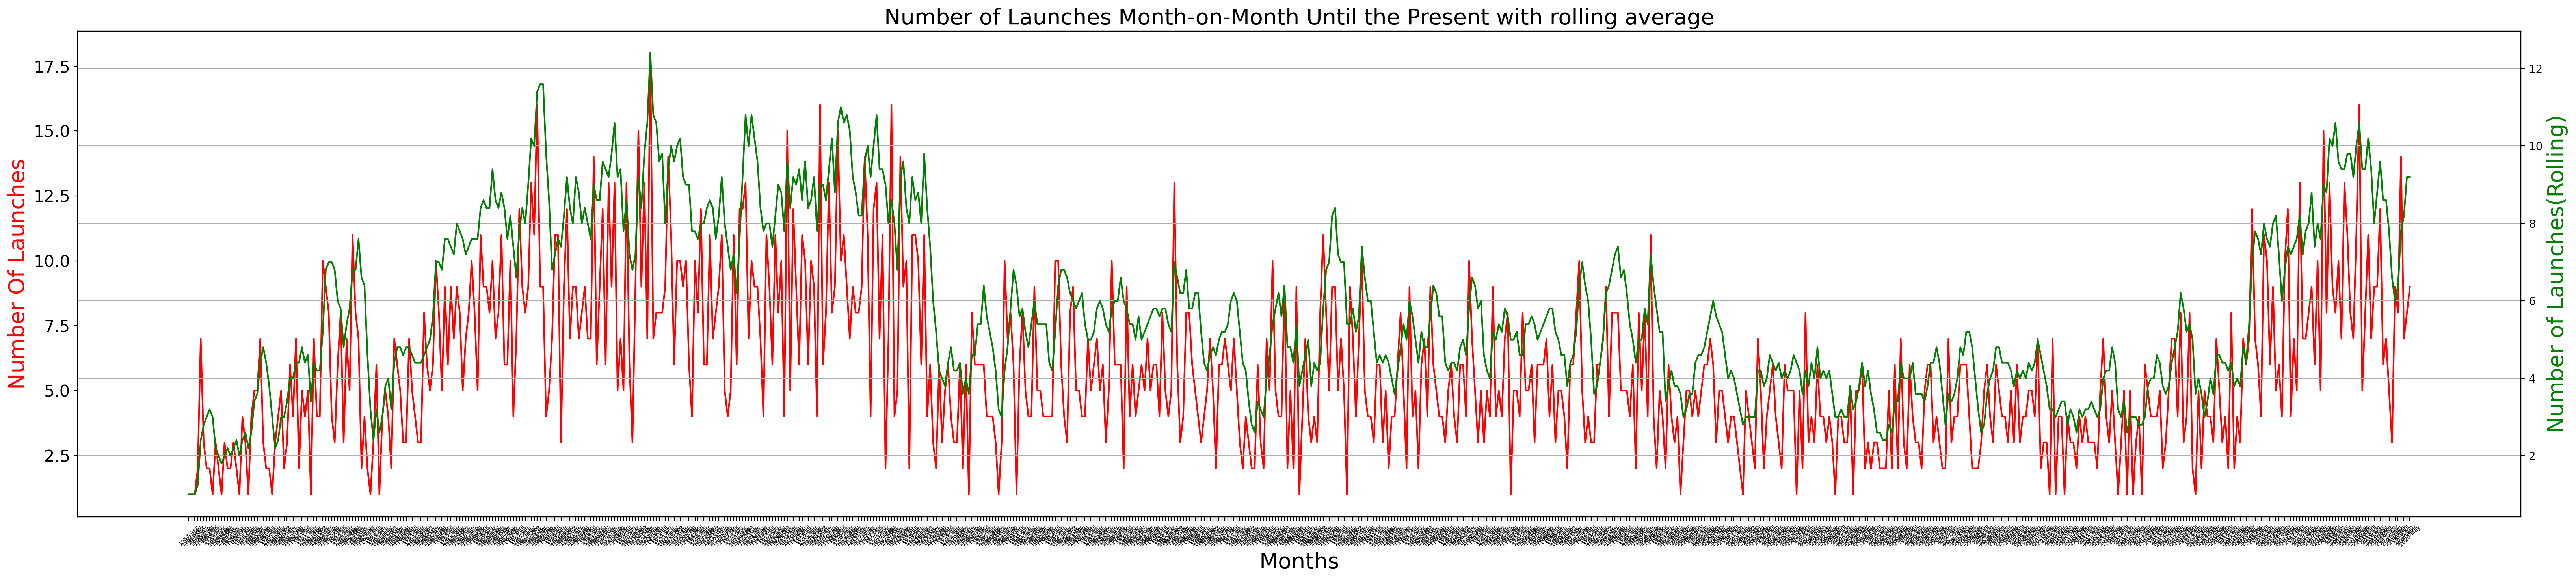

The highest number of launches of all time is 18 and is on 1971-Dec


In [39]:
plt.figure(figsize=(40,8), dpi=200)
plt.yticks(fontsize=15)
plt.xticks(fontsize=5, rotation=45)
plt.title("Number of Launches Month-on-Month Until the Present with rolling average", fontsize=20)
ax1 = plt.gca()
ax2 = plt.twinx()
# ax1.set_xlim(monthly_launches['Launch Date'].min(), monthly_launches['Launch Date'].max())
ax1.set_xlabel("Months", fontsize=20)
ax1.set_ylabel("Number Of Launches", fontsize=20, c='red')
ax1.plot(monthly_launches['Launch Date'], monthly_launches['Launches per Month'], c='red')
ax2.set_ylabel('Number of Launches(Rolling)', fontsize=20, c='green')
ax2.plot(monthly_launches['Launch Date'], rolling_average.values, c='green')
plt.grid(True, axis='both')
plt.show()
highest_launch_month  = monthly_launches[monthly_launches['Launches per Month'] == monthly_launches['Launches per Month'].max()].values[0]
print(f'The highest number of launches of all time is {highest_launch_month[1]} and is on {highest_launch_month[0]}')


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [40]:
monthly_launches_whole = monthly_launches.copy()
monthly_launches_whole['Launch Date'] = pd.to_datetime(monthly_launches_whole['Launch Date'], format='%Y-%b')
monthly_launches_whole['Launch Date'] = monthly_launches_whole['Launch Date'].dt.strftime('%B')
monthly_launches_whole = monthly_launches_whole.groupby('Launch Date')['Launches per Month'].sum().reset_index()
monthly_launches_whole

,Launch Date,Launches per Month
0,April,383
1,August,371
2,December,449
3,February,336
4,January,268
5,July,351
6,June,402
7,March,353
8,May,326
9,November,336


In [41]:
bar = px.bar(monthly_launches_whole, x='Launch Date', y='Launches per Month', color='Launches per Month', title="Bar chart showing Launches for all 12 months", labels={'Launch Date': 'Months'})
bar.show()
print('As seen from above Most popular months are April, December, September,June, October, June and the least months are January and February.')
print('Februay and January seems to the least favourable months due to Winter condition, wind in winters, precipitaion chances are higher and cloud coverage is higher in winters.')

As seen from above Most popular months are April, December, September,June, October, June and the least months are January and February.
Februay and January seems to the least favourable months due to Winter condition, wind in winters, precipitaion chances are higher and cloud coverage is higher in winters.


# How has the Launch Price varied Over Time?  

In [42]:
clean_df_dates = clean_df.copy()
clean_df_dates.Date = pd.to_datetime(clean_df.Date, utc=True)
clean_df_dates.Date = clean_df_dates.Date.dt.strftime('%Y')
clean_df_dates.rename(columns={'Date': 'Year'}, inplace=True)
Launch_price = clean_df_dates.groupby('Year').agg({'Price': pd.Series.mean}).reset_index()
Launch_price.tail()

,Year,Price
45,2016,79.46
46,2017,69.49
47,2018,64.75
48,2019,59.61
49,2020,56.65


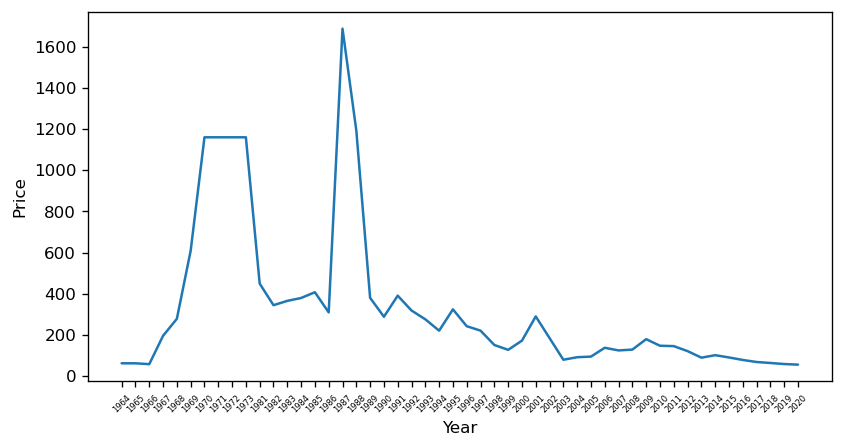

As seen from the graph the trend shows a decrease in average price. The reason for this being Technological
 Advancements,Competition,Economies of Scale,Commercialization,Streamlined Operations,Government Initiatives,Innovation,Learning Curve.


In [43]:
plt.figure(figsize=(8,4), dpi=120)
plt.xticks(fontsize=5, rotation=45)
with sns.axes_style(style='whitegrid'):
    sns.lineplot(data=Launch_price, x=Launch_price.Year, y=Launch_price.Price)
plt.show()
print('As seen from the graph the trend shows a decrease in average price. The reason for this being Technological\n Advancements,Competition,Economies of Scale,Commercialization,Streamlined Operations,Government Initiatives,Innovation,Learning Curve.')

# The Number of Launches over Time by the Top 10 Organisations. 


In [44]:
data_organisation_launch = not_clean_df_dates.groupby(['Organisation', 'Date']).agg({'Detail': pd.Series.count})
data_organisation_launch.rename(columns={'Detail':'Launches', 'Date':'Year'}, inplace=True)
data_organisation_launch

Launches
Organisation Date          
AEB          1997         1
             1999         1
             2003         1
AMBA         1958         7
             1967         1
...                     ...
VKS RF       2020         3
Virgin Orbit 2020         1
Yuzhmash     1969         1
             1991         1
i-Space      2019         1

[663 rows x 1 columns]

In [45]:
#the below code is to retrieve the top 10 organisations in terms of launches
v = data_organisation_launch.groupby(['Organisation'])['Launches'].sum().reset_index()
v.sort_values('Launches',ascending=False, inplace=True)
w = v.Organisation.values[:10]
filtered_df = data_organisation_launch[data_organisation_launch.index.get_level_values('Organisation').isin(w)]
filtered_df

Launches
Organisation Date          
Arianespace  1984         3
             1985         4
             1986         3
             1987         2
             1988         6
...                     ...
VKS RF       2016         4
             2017         6
             2018         5
             2019         8
             2020         3

[323 rows x 1 columns]

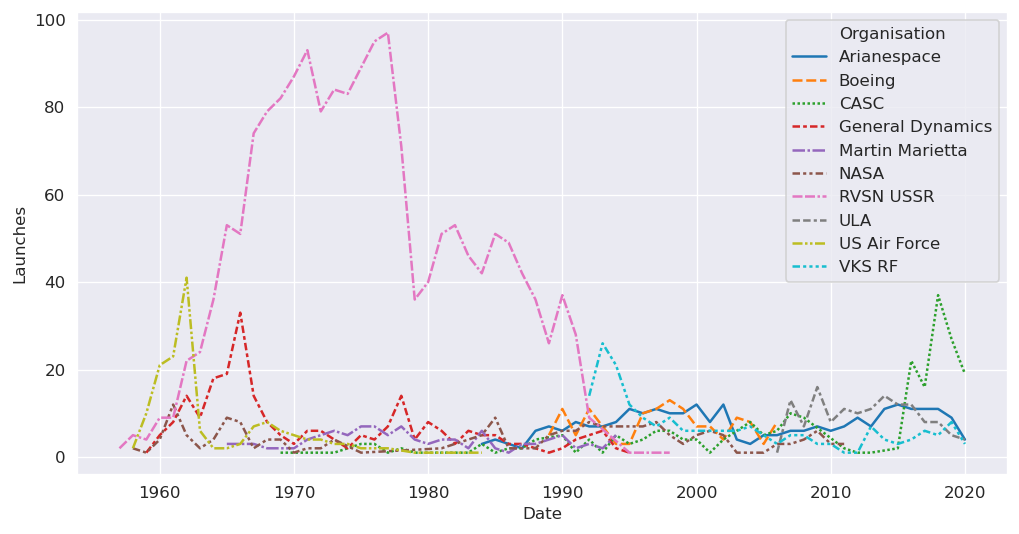

As seen from the above graph US and Russia were dominant in space launches, 
 After 1991 there is a decline in space launches as cold war ended along with it the fierce competition.
 It is seen that NASA is giving private companies like SpaceX rocket launches mission as they are cost efficient.
CASC has also increased their rocket launches.


In [46]:
plt.figure(figsize=(10,5), dpi=120)
with sns.axes_style(style='darkgrid'):
    sns.lineplot(data=filtered_df, x='Date', y='Launches',  hue='Organisation', style='Organisation')
plt.show()
print('As seen from the above graph US and Russia were dominant in space launches, \n After 1991 there is a decline in space launches as cold war ended along with it the fierce competition.\n It is seen that NASA is giving private companies like SpaceX rocket launches mission as they are cost efficient.\nCASC has also increased their rocket launches.')

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [47]:
unfiltered_df = df_data.copy()
unfiltered_df['Country'] = unfiltered_df.Location.str.split().str[-1]
unfiltered_df.Date = pd.to_datetime(unfiltered_df.Date, utc=True)
unfiltered_df.Date = unfiltered_df.Date.dt.year
usa_usser_kaz_df = unfiltered_df[unfiltered_df['Country'].isin(['Kazakhstan', 'Russia', 'USA']) & (unfiltered_df['Date']<=1991)] 
usa_usser_kaz_df

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
1718,1718,1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,Kazakhstan
1719,1719,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russia
1721,1721,1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA
1722,1722,1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA
1723,1723,1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russia
...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan


In [48]:
# Replacing kazakshtan with russia
usa_ussr_df = usa_usser_kaz_df.copy()
usa_ussr_df['Country'] = usa_ussr_df['Country'].replace('Kazakhstan','Russia')
usa_ussr_df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
1718,1718,1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,Russia
1719,1719,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russia
1721,1721,1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA
1722,1722,1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA
1723,1723,1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russia


## Plotly Pie Chart comparing the total number of launches of the USSR and the USA


In [49]:
pie_chart_data = usa_ussr_df.groupby('Country')['Detail'].count().reset_index()
pie_chart_data['Country'] = pie_chart_data['Country'].replace('Russia', 'USSR')
pie_chart_data

,Country,Detail
0,USSR,1770
1,USA,662


In [50]:
pie = px.pie(pie_chart_data, values='Detail', names='Country', title='Launches USA vs USSR', hover_data=['Country'], labels={'Detail':'Launches'})
pie.update_traces(textposition='inside', textinfo='percent+label')
pie.show()

## Chart Showing the Total Number of Launches Year-On-Year by the Two Superpowers

In [51]:
year_on_year = usa_ussr_df.groupby(['Country','Date']).agg({'Detail': pd.Series.count}).reset_index()
year_on_year.rename(columns={'Detail': 'Launches', 'Date':'Year'}, inplace=True)
year_on_year

,Country,Year,Launches
0,Russia,1957,2
1,Russia,1958,5
2,Russia,1959,4
3,Russia,1960,9
4,Russia,1961,9
...,...,...,...
65,USA,1987,6
66,USA,1988,7
67,USA,1989,16
68,USA,1990,26


In [52]:
line_chart_compare = px.line(year_on_year, x='Year', y='Launches', color='Country', markers=True)
line_chart_compare.show()
print('As seen from the graph USSR had higher number of launches, both USA and USSR have contributed to space research advancements in recent times.')

As seen from the graph USSR had higher number of launches, both USA and USSR have contributed to space research advancements in recent times.


## The Total Number of Mission Failures Year on Year.

In [53]:
failed_missions_df = not_clean_df_dates[not_clean_df_dates.Mission_Status != 'Success']
failed_missions_df.Mission_Status = failed_missions_df.Mission_Status.str.split(' ').str[-1]
failed_missions_df.rename(columns={'Date':'Year'}, inplace=True)
failed_missions_df.head()

C:\Users\jayes\AppData\Local\Temp\ipykernel_20844\4134922249.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jayes\AppData\Local\Temp\ipykernel_20844\4134922249.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Year,Detail,Rocket_Status,Price,Mission_Status,Country
11,11,11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020,"Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,CHN
15,15,15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand",2020,Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.50,Failure,NZL
27,27,27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...",2020,LauncherOne | Demo Flight,StatusActive,12.00,Failure,USA
36,36,36,CASC,"LC-2, Xichang Satellite Launch Center, China",2020,Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN
43,43,43,CASC,"LC-201, Wenchang Satellite Launch Center, China",2020,Long March 7A | XJY-6,StatusActive,NaN,Failure,CHN


In [54]:
failure_year_on_year = failed_missions_df.groupby('Year').agg({'Mission_Status': pd.Series.count}).reset_index()
failure_year_on_year.rename(columns={'Mission_Status':'Failures'}, inplace=True)
failure_year_on_year


,Year,Failures
0,1957,1
1,1958,22
2,1959,12
3,1960,20
4,1961,20
...,...,...
59,2016,4
60,2017,8
61,2018,4
62,2019,9


In [55]:
failure_chart = px.line(failure_year_on_year, x='Year', y='Failures', title='Mission Failures Year on Year')
failure_chart.show()

## The Percentage of Failures over Time


In [56]:
data = not_clean_df_dates.copy()
data.Mission_Status = data.Mission_Status.str.split().str[-1]
success_failure = data.groupby(['Date', 'Mission_Status']).agg({'Mission_Status': pd.Series.count})
success_failure.rename(columns={'Mission_Status':'Count'}, inplace=True)
success_failure['Percentage Failure'] = success_failure.Count/success_failure.groupby('Date')['Count'].transform('sum') * 100  #.transform sums the serie which is grouped and return list of same lenght as the grouped series
success_failure.reset_index(inplace=True)
success_failure.rename(columns={'Date':'Year'}, inplace=True)
success_failure = success_failure[success_failure.Mission_Status != 'Success']
success_failure


,Year,Mission_Status,Count,Percentage Failure
0,1957,Failure,1,33.33
2,1958,Failure,22,78.57
4,1959,Failure,12,60.00
6,1960,Failure,20,51.28
8,1961,Failure,20,38.46
...,...,...,...,...
118,2016,Failure,4,4.44
120,2017,Failure,8,8.70
122,2018,Failure,4,3.42
124,2019,Failure,9,8.26


In [57]:
failure_percent_chart = px.line(success_failure, x='Year', y='Percentage Failure', markers=True)
failure_percent_chart.show()


In [58]:
print('The number of failures goes down over time.The countries got better at minimizing the risk for overall failure.\n As seen from the recent years the number of failures are more or less constant, the reason might be because of new players entering the market\n and top player stabalizing their missions.')

The number of failures goes down over time.The countries got better at minimizing the risk for overall failure.
 As seen from the recent years the number of failures are more or less constant, the reason might be because of new players entering the market
 and top player stabalizing their missions.


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)



In [59]:
cold_war = not_clean_df_dates.copy()
cold_war.loc[cold_war['Date']<1991, 'Country'] = cold_war.loc[cold_war['Date']<1991, 'Country'].replace('KAZ', 'RUS') 
number_of_launches = cold_war.groupby(['Date', 'Country']).agg({'Detail':pd.Series.count})
launch_series = number_of_launches.groupby('Date')['Detail'].idxmax()
highest_launches = number_of_launches.loc[launch_series].reset_index().rename(columns={'Detail': 'Launches', 'Date':'Year'})
highest_launches

,Year,Country,Launches
0,1957,RUS,2
1,1958,USA,23
2,1959,USA,16
3,1960,USA,30
4,1961,USA,43
...,...,...,...
59,2016,USA,27
60,2017,USA,30
61,2018,CHN,39
62,2019,CHN,34


In [60]:
leading_countries = px.bar(highest_launches, x='Year', y='Launches', title='Leading country per year', hover_data='Country', text_auto='.2s', color='Country')
leading_countries.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
leading_countries.show()

In [61]:
only_successful_mission = cold_war[cold_war.Mission_Status == 'Success']
number_success_launches = only_successful_mission.groupby(['Date', 'Country']).agg({'Detail':pd.Series.count})
clean = number_success_launches.groupby('Date')['Detail'].idxmax()
number_success_launches_final = number_success_launches.loc[clean]
number_success_launches_final.reset_index(inplace=True)
number_success_launches_final.rename(columns={'Date':'Year', 'Detail': 'Launches'}, inplace=True)
number_success_launches_final

,Year,Country,Launches
0,1957,RUS,2
1,1958,USA,5
2,1959,USA,6
3,1960,USA,16
4,1961,USA,27
...,...,...,...
59,2016,USA,26
60,2017,USA,30
61,2018,CHN,38
62,2019,CHN,32


In [62]:
print("The below graph is for the leaders in successfully completing the mission")
leading_countries = px.bar(number_success_launches_final, x='Year', y='Launches', title='Leading country per year', hover_data='Country', text_auto='.2s', color='Country')
leading_countries.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
leading_countries.show()

The below graph is for the leaders in successfully completing the mission


# Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [63]:
data_organisation_launch = not_clean_df_dates.groupby(['Date', 'Organisation']).agg({'Detail': pd.Series.count})
data_organisation_launch
clean_up = data_organisation_launch.groupby('Date')['Detail'].idxmax()
organisation_leader = data_organisation_launch.loc[clean_up]
organisation_leader.reset_index(inplace=True)
organisation_leader.rename(columns={'Date':'Year', 'Detail': 'Launches'}, inplace=True)
organisation_leader

,Year,Organisation,Launches
0,1957,RVSN USSR,2
1,1958,US Navy,12
2,1959,US Air Force,10
3,1960,US Air Force,21
4,1961,US Air Force,23
...,...,...,...
59,2016,CASC,22
60,2017,SpaceX,18
61,2018,CASC,37
62,2019,CASC,27


In [64]:
leading_organisation = px.bar(organisation_leader, x='Year', y='Launches', color='Organisation', title='Leading Organisation per year', text_auto='0.2s')
leading_organisation.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
leading_organisation.show()


In [65]:
print('As seen from the above graph\nFrom 1970 to 1980 RVSN USSR was dominant in number of launches\nFrom 2018 to 2020 we can see that CASC is dominant in sapce launches.')

As seen from the above graph
From 1970 to 1980 RVSN USSR was dominant in number of launches
From 2018 to 2020 we can see that CASC is dominant in sapce launches.
